In [71]:
from nt import truncate

from IPython.display import Image
from scipy.optimize import brent

### Bellman Equation Solver - Why Bellman Equations?


In [72]:
Image(url="images/bellman_4state_vf.jpg", width=300, height=300)

#### Bellman Equation for State Value function - Elegant Solution
Value function = Expected return under the policy pi. This is an average over the return obtained by each sequence of actions an agent could possible choose, infinitely many possible features.

Using the Bellman equation, we can write down an expression for the value of state **A** in terms of the sum of the four possible actions and the resulting possible successor states. We can simplify the expression further in this case, because for each action, there's only one possible associated next state and reward. That's the sum over s’ and r reduces to a single value.


Note that here s’ and r still depend on the selected action and the current state S. But to keep the notation short, we haven't done this explicitly. If we go right from state A, we land in state B and receive a reward of +5. This happens one-quarter of the time under the random policy.

In [73]:
Image(url="images/bellman_4state_vf2.jpg", width=500, height=500)

If we go down, we land in state C and receive no immediate reward. Again, this occurs
one-quarter of the time. If you go either up or left, we will land back in state A again. Each
of the actions, up and left, again, occurs one-quarter of the time. Since they both land in
state A and received no reward, we combine them into a single term with a factor of 1 over
2. Finally, we arrived at the expression shown here for the value of state A. We can write
down a similar equation for each of the other states, B, C, and D. Now we have a system of
equations for four variables. You can solve this by hand if you want, or put it into an
automatic equation solver

In [74]:
Image(url="images/bellman_4state_vf4.jpg", width=300, height=300)

In [75]:
import numpy as np

# Corrected system of equations based on the updated Bellman equations and directionality
A_final = np.array([
    [0.65, -0.175, -0.175, 0],         # Equation for V_pi(A)
    [-0.175, 0.65, 0, -0.175],         # Equation for V_pi(B)
    [-0.175, 0, 0.65, -0.175],         # Equation for V_pi(C)
    [0, -0.175, -0.175, 0.65]          # Equation for V_pi(D)
])

B_final = np.array([
    1.25,  # Right-hand side for V_pi(A)
    2.5,   # Right-hand side for V_pi(B)
    0,     # Right-hand side for V_pi(C)
    1.25   # Right-hand side for V_pi(D)
])

# Solve the final system
V_pi_final = np.linalg.solve(A_final, B_final)
V_pi_final


array([4.16666667, 6.08974359, 2.24358974, 4.16666667])

In [76]:
Image(url="images/bellman_4state_vf3.jpg", width=300, height=300)

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = 0.7  # Discount factor
grid_size = 5  # 5x5 grid
goal_state = (3, 2)  # Bottom-right corner is the goal
reward_goal = 5  # Reward for reaching the goal
actions = ['up', 'down', 'left', 'right']  # Possible actions
max_iterations = 1000  # Maximum number of iterations for value iteration
tolerance = 1e-4  # Convergence tolerance

# Initialize value function V(s) with zeros
V = np.zeros((grid_size, grid_size))

In [78]:
# print V
V

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [79]:
# Reward function
def reward(s_next, goal_state): # Do we need action here?
    if s_next == goal_state: # Bottom-right corner is the goal
        return reward_goal
    return 0

In [80]:
# Transition function
def transition(s, a):
    """Returns the next state given a state and an action."""
    x, y = s
    if a == 'up':
        return (max(x - 1, 0), y)
    elif a == 'down':
        return (min(x + 1, grid_size - 1), y)
    elif a == 'left':
        return (x, max(y - 1, 0))
    elif a == 'right':
        return (x, min(y + 1, grid_size - 1))

In [81]:
# check transition function
transition((3, 3), 'down')  # Move down

(4, 3)

In [82]:
# Calculate Q(s, a)
def Q(s, a):
    s_next = transition(s, a)
    r = reward(s_next, goal_state)
    #print("r: ", r, "| gamma: ", gamma, "| V[s_next]: ", V[s_next])
    return r + gamma * V[s_next]

In [83]:
# V[2, 2] = 1
# check Q function
V = np.zeros((grid_size, grid_size))
Q((1, 2), 'down')  # Move down

0.0

In [84]:
# Perform value iteration to calculate V(s)
for iteration in range(max_iterations):
    delta = 0
    new_V = np.copy(V)
    
    # Loop over all states in the grid
    for x in range(grid_size):
        for y in range(grid_size):
            s = (x, y)
            # Calculate the value for each action
            q_values = [Q(s, a) for a in actions]
            new_V[s] = max(q_values)            
            # Update the delta for convergence checking
            delta = max(delta, np.abs(new_V[s] - V[s]))
    # print("Iteration for new_V: ", iteration)
    # print(new_V)
    # Update the value function
    V = new_V
    # print("Iteration = for V", iteration)
    # print(V)
    
    # Check for convergence
    if delta < tolerance:
        break

In [85]:
# print V
V

array([[2.35381329, 3.3626693 , 4.80381329, 3.3626693 , 2.35381329],
       [3.3626693 , 4.80381329, 6.8626693 , 4.80381329, 3.3626693 ],
       [4.80381329, 6.8626693 , 9.80381329, 6.8626693 , 4.80381329],
       [6.8626693 , 9.80381329, 6.8626693 , 9.80381329, 6.8626693 ],
       [4.80381329, 6.8626693 , 9.80381329, 6.8626693 , 4.80381329]])

In [86]:
# Compute the optimal policy based on Q(s, a), allowing for multiple optimal actions
policy = np.empty((grid_size, grid_size), dtype=object)

for x in range(grid_size):
    for y in range(grid_size):
        s = (x, y)
        q_values = [Q(s, a) for a in actions]
        max_value = max(q_values)
        # Store all actions that yield the maximum value
        # Question: If we know 𝑄∗ 𝑠𝑡 , 𝑎𝑡 , what is the best action?
        # Obviously, the best action is 𝑎∗ = 𝑎𝑟𝑔𝑚𝑎𝑥_𝑎 𝑄∗(𝑠, 𝑎)
        # For large problem linear solution not possible. Then? We have to approximate the Q function
        #Challenge: We don’t know 𝑄∗ 𝑠𝑡 , 𝑎𝑡 .
        # • Solution: Deep Q Network (DQN) -> Go to the next part of this notebook
        # • Use neural network 𝑄(𝑠, 𝑎; 𝒘) to approximate 𝑄∗ 𝑠𝑡 , 𝑎𝑡 .
        best_actions = [actions[i] for i, q in enumerate(q_values) if np.isclose(q, max_value)]
        policy[s] = best_actions

# Print the policy to debug the KeyError issue
print("Optimal Policy Grid (with multiple optimal actions):")
print(policy)


Optimal Policy Grid (with multiple optimal actions):
[[list(['down', 'right']) list(['down', 'right']) list(['down'])
  list(['down', 'left']) list(['down', 'left'])]
 [list(['down', 'right']) list(['down', 'right']) list(['down'])
  list(['down', 'left']) list(['down', 'left'])]
 [list(['down', 'right']) list(['down', 'right']) list(['down'])
  list(['down', 'left']) list(['down', 'left'])]
 [list(['right']) list(['right']) list(['up', 'down', 'left', 'right'])
  list(['left']) list(['left'])]
 [list(['up', 'right']) list(['up', 'right']) list(['up'])
  list(['up', 'left']) list(['up', 'left'])]]


In [87]:
# print policy
policy

array([[list(['down', 'right']), list(['down', 'right']), list(['down']),
        list(['down', 'left']), list(['down', 'left'])],
       [list(['down', 'right']), list(['down', 'right']), list(['down']),
        list(['down', 'left']), list(['down', 'left'])],
       [list(['down', 'right']), list(['down', 'right']), list(['down']),
        list(['down', 'left']), list(['down', 'left'])],
       [list(['right']), list(['right']),
        list(['up', 'down', 'left', 'right']), list(['left']),
        list(['left'])],
       [list(['up', 'right']), list(['up', 'right']), list(['up']),
        list(['up', 'left']), list(['up', 'left'])]], dtype=object)

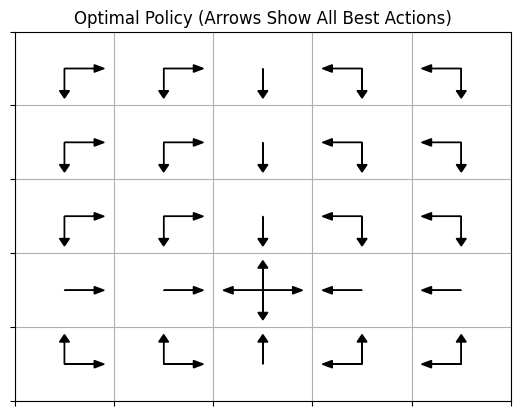

In [88]:
# Plotting the policy grid with arrows
def plot_policy(policy):
    fig, ax = plt.subplots()
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    
    # Directions for arrows
    arrow_dict = {
        'up': (0, 0.3),
        'down': (0, -0.3),
        'left': (-0.3, 0),
        'right': (0.3, 0)
    }
    
    # Plot arrows for each state
    for x in range(grid_size):
        for y in range(grid_size):
            actions = policy[x, y]
            for action in actions:
                dx, dy = arrow_dict[action]
                ax.arrow(y + 0.5, grid_size - x - 0.5, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')
    
    # Plot grid lines
    ax.set_xticks(np.arange(0, grid_size + 1, 1))
    ax.set_yticks(np.arange(0, grid_size + 1, 1))
    ax.grid(True)
    
    # Remove axis labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    plt.title('Optimal Policy (Arrows Show All Best Actions)')
    plt.show()

# Show the optimal policy
plot_policy(policy)

# DQN Example

Approximate the Q Function

Question: If we know 𝑄∗(𝑠𝑡 , 𝑎𝑡), what is the best action?

• Obviously, the best action is 𝑎∗ = 𝑎𝑟𝑔𝑚𝑎𝑥_𝑎 𝑄∗(𝑠, 𝑎)

Challenge: We don’t know 𝑄∗(𝑠𝑡 , 𝑎𝑡).

• Solution: Deep Q Network (DQN)

• Use neural network 𝑄(𝑠, 𝑎; 𝒘) to approximate 𝑄∗(𝑠_𝑡 , 𝑎_𝑡) .

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque

# Hyperparameters
gamma = 0.7              # Discount factor
learning_rate = 0.001    # Learning rate for the optimizer
epsilon_start = 1.0      # Initial epsilon for exploration
epsilon_min = 0.01       # Minimum epsilon
epsilon_decay = 0.995    # Epsilon decay rate per episode
buffer_size = 1000       # Replay buffer size
batch_size = 32          # Mini-batch size for training
target_update_freq = 10  # Frequency to update the target network

# Environment parameters
grid_size = 5
goal_state = (3, 2)
reward_goal = 5
actions = ['up', 'down', 'left', 'right']

In [90]:
# DQN Model Definition
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [91]:
# Helper functions for the environment
def to_state(x, y):
    """Converts (x, y) position to a one-hot encoded state vector."""
    state = np.zeros(grid_size * grid_size)
    state[x * grid_size + y] = 1
    return state

def transition(state, action):
    """Defines how the state changes with each action."""
    x, y = state
    if action == 'up':
        return max(x - 1, 0), y
    elif action == 'down':
        return min(x + 1, grid_size - 1), y
    elif action == 'left':
        return x, max(y - 1, 0)
    elif action == 'right':
        return x, min(y + 1, grid_size - 1)
def reward(state):
    """Defines the reward structure for reaching the goal."""
    return reward_goal if state == goal_state else 0

In [92]:
# Initialize networks and optimizer
state_size = grid_size * grid_size
action_size = len(actions)
policy_net = DQN(state_size, action_size)
target_net = DQN(state_size, action_size)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()  # Target network is not trained directly

DQN(
  (fc1): Linear(in_features=25, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=24, bias=True)
  (fc3): Linear(in_features=24, out_features=4, bias=True)
)

In [93]:
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=buffer_size)
# Training process
def train_dqn(num_episodes):
    epsilon = epsilon_start
    for episode in range(num_episodes):
        # Initialize the environment
        x, y = np.random.randint(0, grid_size), np.random.randint(0, grid_size)
        state = to_state(x, y)
        # print("State: ", state)
        done = False
        total_reward = 0

        while not done:
            # Select action using epsilon-greedy policy
            if random.random() < epsilon:
                action_index = random.choice(range(action_size))
                # print("Action: ", action_index) 
            else:
                with torch.no_grad():
                    q_values = policy_net(torch.FloatTensor(state))
                    action_index = torch.argmax(q_values).item()
                    # print("Action: else: ",action_index)
            
            action = actions[action_index]
            # Take action in the environment
            next_x, next_y = transition((x, y), action)
            next_state = to_state(next_x, next_y)
            reward_value = reward((next_x, next_y))
            done = (next_x, next_y) == goal_state

            # Store experience in replay buffer
            replay_buffer.append((state, action_index, reward_value, next_state, done))
            total_reward += reward_value
            state = next_state
            x, y = next_x, next_y

            # Update the policy network using a batch of experiences
            if len(replay_buffer) >= batch_size:
                # print("LEN: ", len(replay_buffer))
                batch = random.sample(replay_buffer, batch_size)
                # print("BATCH: ", batch)
                # done = True
                train_batch(batch)

        # Update epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        
        # Update target network
        if episode % target_update_freq == 0:
            target_net.load_state_dict(policy_net.state_dict())

        print(f"Episode {episode + 1}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")


In [94]:
def train_batch(batch):
    # Unpack the batch
    states, actions, rewards, next_states, dones = zip(*batch)
    
    states = torch.FloatTensor(states)
    actions = torch.LongTensor(actions)
    rewards = torch.FloatTensor(rewards)
    next_states = torch.FloatTensor(next_states)
    dones = torch.BoolTensor(dones)
    
    # Compute current Q-values
    q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
    
    # Compute target Q-values
    with torch.no_grad():
        max_next_q_values = target_net(next_states).max(1)[0]
        target_q_values = rewards + (gamma * max_next_q_values * (~dones))

    # Compute loss and update policy network
    loss = nn.functional.mse_loss(q_values, target_q_values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [95]:
# Run training
num_episodes = 500  # Adjust the number of episodes as needed
train_dqn(num_episodes)

Episode 1, Total Reward: 5, Epsilon: 0.9950
Episode 2, Total Reward: 5, Epsilon: 0.9900
Episode 3, Total Reward: 5, Epsilon: 0.9851
Episode 4, Total Reward: 5, Epsilon: 0.9801
Episode 5, Total Reward: 5, Epsilon: 0.9752
Episode 6, Total Reward: 5, Epsilon: 0.9704
Episode 7, Total Reward: 5, Epsilon: 0.9655
Episode 8, Total Reward: 5, Epsilon: 0.9607
Episode 9, Total Reward: 5, Epsilon: 0.9559
Episode 10, Total Reward: 5, Epsilon: 0.9511
Episode 11, Total Reward: 5, Epsilon: 0.9464
Episode 12, Total Reward: 5, Epsilon: 0.9416
Episode 13, Total Reward: 5, Epsilon: 0.9369
Episode 14, Total Reward: 5, Epsilon: 0.9322
Episode 15, Total Reward: 5, Epsilon: 0.9276
Episode 16, Total Reward: 5, Epsilon: 0.9229
Episode 17, Total Reward: 5, Epsilon: 0.9183
Episode 18, Total Reward: 5, Epsilon: 0.9137
Episode 19, Total Reward: 5, Epsilon: 0.9092
Episode 20, Total Reward: 5, Epsilon: 0.9046
Episode 21, Total Reward: 5, Epsilon: 0.9001
Episode 22, Total Reward: 5, Epsilon: 0.8956
Episode 23, Total R

In [96]:
# Define a mapping from action index to direction
action_mapping = {0: '↑', 1: '↓', 2: '←', 3: '→'}  # Adjust based on action ordering in your DQN model

# Function to print the optimal policy
def print_optimal_policy():
    policy_grid = np.empty((grid_size, grid_size), dtype=str)

    for x in range(grid_size):
        for y in range(grid_size):
            # Convert the (x, y) state to the one-hot encoded state representation
            state = to_state(x, y)
            state_tensor = torch.FloatTensor(state).unsqueeze(0)  # Add batch dimension

            # Get Q-values from the policy network
            with torch.no_grad():
                q_values = policy_net(state_tensor)

            # Select the action with the highest Q-value
            optimal_action = torch.argmax(q_values).item()
            policy_grid[x, y] = action_mapping[optimal_action]
    
    # Mark the goal state for clarity
    policy_grid[goal_state] = 'G'
    
    # Print the policy grid
    for row in policy_grid:
        print(" ".join(row))

# Run the function to print the optimal policy
print_optimal_policy()


↓ ↓ ↓ ↓ ↓
→ → ↓ ↓ ↓
→ → ↓ ↓ ←
→ → G ← ←
→ → ↑ ← ↑


### **Lecture Notes: Complete DQN and Double DQN Implementation for CartPole**

### **1. Background: Introduction to CartPole**

The **CartPole** problem involves balancing a pole on a moving cart by applying forces to the cart. The agent (Q-network) will try to learn how to control the cart by maximizing the reward received for keeping the pole upright.

### **Key Concepts**:
- **State**: A 4D vector representing the cart's position, velocity, pole angle, and pole's tip velocity.
- **Actions**: The agent can move the cart left (0) or right (1).
- **Reward**: The agent receives +1 for each timestep that the pole remains balanced.

In this class, we'll use **Deep Q-Network (DQN)** and **Double DQN** to solve this problem.

---

### **2. Step-by-Step DQN Implementation**

### **Step 1: Basic Game Loop**
We will begin with a simple game loop that interacts with the CartPole environment using random actions. This will help familiarize you with how the environment works.

In [97]:
import gym
env = gym.make('CartPole-v1', render_mode="rgb_array")

# Play multiple episodes with random actions
for episode in range(10):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        env.render()  # Optional visualization of the environment
        action = env.action_space.sample()  # Random action (left or right)
        next_state, reward, done, truncated, _ = env.step(action)  # Take action and observe the next state
        
        total_reward += reward  # Accumulate reward
        state = next_state  # Move to the next state

    if done:
        print(f"Episode {episode+1} finished, total reward: {total_reward}")

env.close()

Episode 1 finished, total reward: 13.0
Episode 2 finished, total reward: 36.0
Episode 3 finished, total reward: 15.0
Episode 4 finished, total reward: 19.0
Episode 5 finished, total reward: 28.0
Episode 6 finished, total reward: 13.0
Episode 7 finished, total reward: 10.0
Episode 8 finished, total reward: 15.0
Episode 9 finished, total reward: 21.0
Episode 10 finished, total reward: 20.0


---

### **Step 2: Replacing Random Actions with Q-Network**

We'll now replace the random actions with actions predicted by a **Q-Network**. The Q-Network will output Q-values for each action based on the current state.

#### **Task**: Implement the `forward` function of the Q-Network.

In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

# Define Q-Network
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, state):
        # TODO: Implement forward pass using ReLU activations
        state = torch.relu(self.fc1(state))
        state = torch.relu(self.fc2(state))
        return self.fc3(state) # Output Q-values for actions


# Epsilon-greedy action selection
def choose_action(state, action_dim, epsilon, q_network):
    if np.random.rand() < epsilon:  # Exploration
        return np.random.randint(action_dim) # choose a random action
    else:  # Exploitation
        state = torch.FloatTensor(state).unsqueeze(0) #  # Convert state to tensor and add batch dimension
        with torch.no_grad():
            q_values = q_network(state)  # Get Q-values for all actions
        return torch.argmax(q_values).item()  # Select action with highest Q-value

# Initialize environment and Q-network
env = gym.make('CartPole-v1', render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
q_network = QNetwork(state_dim, action_dim)
epsilon = 0.95

In [99]:
state = env.reset()[0]
state
for i in range(10):
    chosen_action = choose_action(state, action_dim, epsilon, q_network)

### **Step 3: Temporal Difference Learning (TD-Learning)**

Next, we will **train the Q-Network** using **TD-learning**. We will compute the **TD-error** and backpropagate the loss to update the network weights.

#### **Task**: Implement the computation of the target Q-value.

In [100]:
def train_q_network(q_network, optimizer, gamma, state, action, reward, next_state, done):
    state = torch.FloatTensor(state).unsqueeze(0)
    next_state = torch.FloatTensor(next_state).unsqueeze(0)
    #compute current Q-values
    q_values = q_network(state)
    q_value = q_values[0, action]
    
    # TODO: Compute target Q-values using the next state
    with torch.no_grad():
        next_q_values = q_network(next_state) # Get Q-values for next stat
        next_q_value = torch.max(next_q_values)
         # Compute target Q-value
        if done:
            target_q_value = torch.FloatTensor([reward])  # If episode ended, target is just the reward
        else:
            target_q_value = torch.tensor([reward + gamma * next_q_value])  # Bellman equation
    
    target_q_value = target_q_value.view_as(q_value)
    # Compute loss (TD-error) and update the Q-network
    loss = F.mse_loss(q_value, target_q_value)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()
        

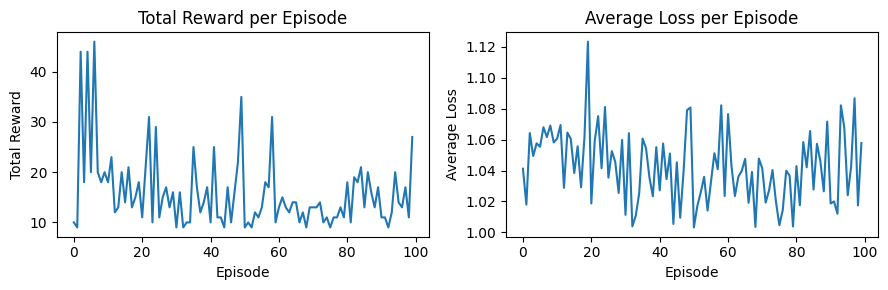

In [101]:
# Hyperparameters for training
gamma = 0.99  # Discount factor
learning_rate = 0.001
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)

# Lists to store rewards and losses for plotting
all_rewards = []
all_losses = []

# Initialize environment and Q-network
env = gym.make('CartPole-v1', render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
q_network = QNetwork(state_dim, action_dim)
epsilon = 0.8
# Play multiple episodes with random actions
for episode in range(100):
    state = env.reset()[0]
    total_reward = 0
    episode_losses = [] # Store/Track losses for this episode
    done = False
    # print("Epsilone: ", epsilon)
    while not done:
        env.render()  # Optional visualization of the environment
        action = choose_action(state, action_dim, epsilon, q_network)  # Random action (left or right)
        next_state, reward, done, truncated, _ = env.step(action)  # Take action and observe the next state
        
        loss = train_q_network(q_network, optimizer, gamma, state, action, reward, next_state, done)
        episode_losses.append(loss)  # Record loss for this step

        total_reward += reward  # Accumulate reward
        state = next_state  # Move to the next state
        
    all_rewards.append(total_reward)
    all_losses.append(np.mean(episode_losses))  # Record average loss for this episode  
    epsilon = max(0.01, epsilon * 0.995)  # Decay epsilon over time
    if done:
        pass
        #print(f"Episode {episode+1} finished, total reward: {total_reward}, Loss = {loss:.4f}")
    # Optional: Decay epsilon
    

env.close()

# Plotting total rewards per episode
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")

# Plotting average loss per episode
plt.subplot(1, 2, 2)
plt.plot(all_losses)
plt.xlabel("Episode")
plt.ylabel("Average Loss")
plt.title("Average Loss per Episode")

plt.tight_layout()
plt.show()

### **Step 4: Experience Replay**

**Experience Replay** improves the training by storing transitions and sampling random batches from the replay buffer.

#### **Task**: Implement the `store` and `sample` functions for the Replay Buffer.

In [102]:
from collections import deque
import random

# Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity) # automatically removes the oldest elements when it reaches its capacity, keeping the buffer size manageable.

    def store(self, transition):
        # TODO: Store the transition (state, action, reward, next_state, done) in the buffer
        self.buffer.append(transition)

    def sample(self, batch_size): # This method samples a random mini-batch of batch_size elements from the buffer.

        # TODO: Sample a random batch from the buffer
        batch = random.sample(self.buffer, batch_size)
        
        # Unpack the batch and convert to numpy arrays for easier handling
        states, actions, rewards, next_states, dones = zip(*batch)
        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        next_states = np.array(next_states)
        dones = np.array(dones, dtype=np.float32) # Convert to float32 for tensor compatibility
        return states, actions, rewards, next_states, dones

    def size(self): # Returns the current size of the buffer, which helps us know when there are enough experiences to start sampling mini-batches for training.
        return len(self.buffer)

# Initialize Replay Buffer
replay_buffer = ReplayBuffer(10000)

### **Step 4.1: Training with Experience Replay**
Integrating Replay Buffer into Training
To use the replay buffer in training, modify the training loop as follows:

Store each experience in the buffer after taking an action.
Sample a batch from the buffer once it reaches a minimum size (e.g., batch_size), and use this batch to train the Q-network.

Here we are handleing mini-batch training by making changes only in the training loop without modifying train_q_network. You can loop through each transition in the batch individually and call train_q_network for each transition in the batch. This approach, **however, will be less efficient than modifying train_q_network to handle batches directly because each call to train_q_network will perform a separate forward and backward pass**.

Here's how you can do it:

1. Sample a mini-batch from the replay buffer.
2. Iterate over each transition in the mini-batch and call train_q_network for each one.

**This approach will still work, but note that it will take longer to train because each transition is handled individually.**

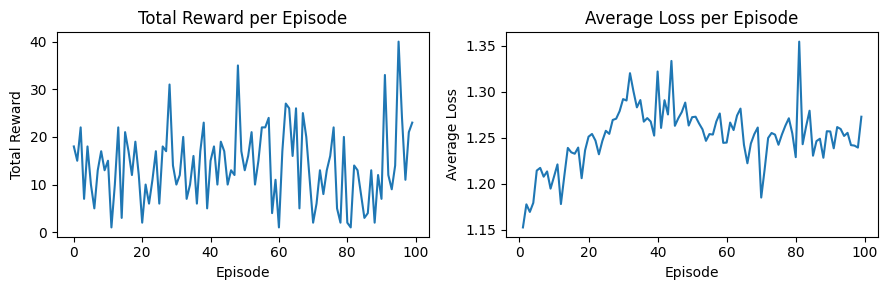

In [103]:
batch_size = 32  # Mini-batch size for training
replay_buffer = ReplayBuffer(10000)  # Initialize Replay Buffer
# Hyperparameters for training
gamma = 0.99  # Discount factor
learning_rate = 0.001
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)

# Lists to store rewards and losses for plotting
all_rewards = []
all_losses = []

# Initialize environment and Q-network
env = gym.make('CartPole-v1', render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
q_network = QNetwork(state_dim, action_dim)
epsilon = 0.95
# Training process
for episode in range(100):
    state = env.reset()[0]
    total_reward = 0
    episode_losses = [] # Store/Track losses for this episode
    done = False

    while not done:
        env.render()  # Optional visualization of the environment
        action = choose_action(state, action_dim, epsilon, q_network)  # Random action (left or right)
        next_state, reward, done, truncated, _ = env.step(action)  # Take action and observe the next state
        # If the episode ends, stop further actions
        if done or truncated:
            replay_buffer.store((state, action, reward, next_state, True))  # Store with done=True
            total_reward += reward
            break  # Exit the loop and start a new episode with env.reset()
            
        replay_buffer.store((state, action, reward, next_state, done))  # Store experience in replay buffer
        
        # Train only if we have enough experiences/samples in the replay buffer
        if replay_buffer.size() >= batch_size:
            # Sample a random batch from the replay buffer
            states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)
            
            #convert to tensor
            # states = torch.FloatTensor(states)
            # actions = torch.LongTensor(actions)
            # rewards = torch.FloatTensor(rewards)
            # next_states = torch.FloatTensor(next_states)
            # dones = torch.BoolTensor(dones)
            # Loop through each transition in the batch
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                # Train on each transition individually
                loss = train_q_network(q_network, optimizer, gamma, state, action, reward, next_state, done)
                episode_losses.append(loss)  # Record loss for this step
            

        total_reward += reward  # Accumulate reward
        state = next_state  # Move to the next state
        
    all_rewards.append(total_reward)
    all_losses.append(np.mean(episode_losses))  # Record average loss for this episode  
    #epsilon = max(0.01, epsilon * 0.995)  # Decay epsilon over time
    if done:
        pass
        # print(f"Episode {episode+1} finished, total reward: {total_reward}, Loss = {loss:.4f}")
    # Optional: Decay epsilon
    

env.close()

# Plotting total rewards per episode
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")

# Plotting average loss per episode
plt.subplot(1, 2, 2)
plt.plot(all_losses)
plt.xlabel("Episode")
plt.ylabel("Average Loss")
plt.title("Average Loss per Episode")

plt.tight_layout()
plt.show()

###  More suitable approach for mini-batch training
To handle mini-batch training with the existing train_q_network function **we need to modify it so that it accepts batches of states, actions, rewards, next_states, and dones instead of individual transitions.** This allows the function to process an entire batch of transitions in one forward and backward pass, improving training efficiency and stability.

In [104]:
import torch.nn.functional as F

# Train the Q-Network using TD-Learning with mini-batches
def train_q_network(q_network, optimizer, gamma, states, actions, rewards, next_states, dones):
    # # Convert input to tensors with batch dimension
    # states = torch.FloatTensor(states)  # Shape: (batch_size, state_dim)
    # next_states = torch.FloatTensor(next_states)  # Shape: (batch_size, state_dim)
    # actions = torch.LongTensor(actions)  # Shape: (batch_size,)
    # rewards = torch.FloatTensor(rewards)  # Shape: (batch_size,)
    # dones = torch.FloatTensor(dones)  # Shape: (batch_size,)

    # Compute current Q-values for all actions in each state in the batch
    q_values = q_network(states)  # Shape: (batch_size, action_dim)
    
    # Select the Q-values for the chosen actions
    q_values = q_values.gather(1, actions.unsqueeze(1)).squeeze(1)  # Shape: (batch_size,)

    # Compute target Q-values using the next states
    with torch.no_grad():
        # Compute Q-values for all actions in the next states
        next_q_values = q_network(next_states)  # Shape: (batch_size, action_dim)
        
        # Select the maximum Q-value for each next state
        max_next_q_values = next_q_values.max(1)[0]  # Shape: (batch_size,)
        
        # Compute the target Q-value using the Bellman equation
        target_q_values = rewards + gamma * max_next_q_values * (1 - dones)  # Shape: (batch_size,)

    # Compute loss (TD-error) and update the Q-network
    loss = F.mse_loss(q_values, target_q_values)  # Mean Squared Error between current and target Q-values
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update the Q-network parameters

    return loss.item()  # Return the loss value for logging


Episode 1 finished, total reward: 13.0, Loss = 1.6384
Episode 2 finished, total reward: 36.0, Loss = 1.0935
Episode 3 finished, total reward: 11.0, Loss = 1.1043
Episode 4 finished, total reward: 31.0, Loss = 1.0944
Episode 5 finished, total reward: 20.0, Loss = 1.0930
Episode 6 finished, total reward: 22.0, Loss = 1.0939
Episode 7 finished, total reward: 11.0, Loss = 1.0924
Episode 8 finished, total reward: 19.0, Loss = 1.0783
Episode 9 finished, total reward: 12.0, Loss = 1.0930
Episode 10 finished, total reward: 11.0, Loss = 1.1010
Episode 11 finished, total reward: 25.0, Loss = 1.1064
Episode 12 finished, total reward: 33.0, Loss = 1.0849
Episode 13 finished, total reward: 23.0, Loss = 1.0673
Episode 14 finished, total reward: 10.0, Loss = 1.0595
Episode 15 finished, total reward: 35.0, Loss = 1.0811
Episode 16 finished, total reward: 18.0, Loss = 1.0979
Episode 17 finished, total reward: 10.0, Loss = 1.0920
Episode 18 finished, total reward: 9.0, Loss = 1.0632
Episode 19 finished,

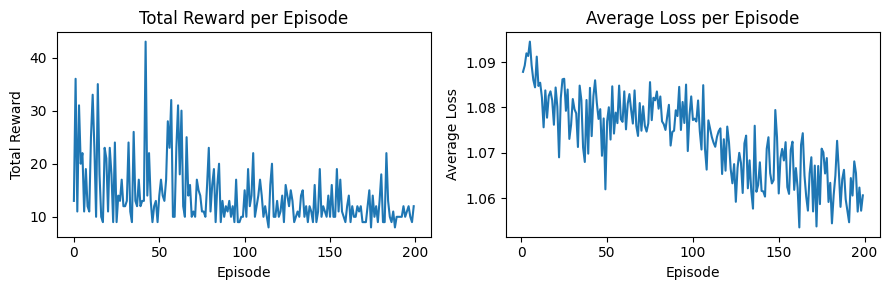

In [105]:
batch_size = 32  # Mini-batch size for training
replay_buffer = ReplayBuffer(10000)  # Initialize Replay Buffer
# Hyperparameters for training
gamma = 0.99  # Discount factor
learning_rate = 0.001
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)

# Lists to store rewards and losses for plotting
all_rewards = []
all_losses = []

# Initialize environment and Q-network
env = gym.make('CartPole-v1', render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
q_network = QNetwork(state_dim, action_dim)
epsilon = 0.8
# Training process
for episode in range(200):
    state = env.reset()[0]
    total_reward = 0
    episode_losses = [] # Store/Track losses for this episode
    done = False

    while not done:
        env.render()  # Optional visualization of the environment
        action = choose_action(state, action_dim, epsilon, q_network)  # Random action (left or right)
        next_state, reward, done, truncated, _ = env.step(action)  # Take action and observe the next state
        # If the episode ends, stop further actions
        if done or truncated:
            replay_buffer.store((state, action, reward, next_state, True))  # Store with done=True
            total_reward += reward
            break  # Exit the loop and start a new episode with env.reset()
            
        replay_buffer.store((state, action, reward, next_state, done))  # Store experience in replay buffer
        
        # Train only if we have enough experiences/samples in the replay buffer
        if replay_buffer.size() >= batch_size:
            # Sample a random batch from the replay buffer
            states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)
            
            # convert to tensor
            states = torch.FloatTensor(states)
            actions = torch.LongTensor(actions)
            rewards = torch.FloatTensor(rewards)
            next_states = torch.FloatTensor(next_states)
            dones = torch.BoolTensor(dones).float()
            
            # Train on each transition individually
            loss = train_q_network(q_network, optimizer, gamma, states, actions, rewards, next_states, dones)
            episode_losses.append(loss)  # Record loss for this step
            

        total_reward += reward  # Accumulate reward
        state = next_state  # Move to the next state
        
    all_rewards.append(total_reward)
    all_losses.append(np.mean(episode_losses))  # Record average loss for this episode  
    epsilon = max(0.01, epsilon * 0.995)  # Decay epsilon over time
    if done:
        # pass
        print(f"Episode {episode+1} finished, total reward: {total_reward}, Loss = {loss:.4f}")
    # Optional: Decay epsilon
    

env.close()

# Plotting total rewards per episode
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")

# Plotting average loss per episode
plt.subplot(1, 2, 2)
plt.plot(all_losses)
plt.xlabel("Episode")
plt.ylabel("Average Loss")
plt.title("Average Loss per Episode")

plt.tight_layout()
plt.show()

Episode 1, Total Reward: 10.0, Loss: 0.6254
Episode 2, Total Reward: 15.0, Loss: 0.2877
Episode 3, Total Reward: 17.0, Loss: 0.0405
Episode 4, Total Reward: 28.0, Loss: 0.0190
Episode 5, Total Reward: 16.0, Loss: 0.0052
Episode 6, Total Reward: 18.0, Loss: 0.0035
Episode 7, Total Reward: 11.0, Loss: 0.0082
Episode 8, Total Reward: 13.0, Loss: 0.0035
Episode 9, Total Reward: 10.0, Loss: 0.0075
Episode 10, Total Reward: 9.0, Loss: 0.0006
Episode 11, Total Reward: 14.0, Loss: 0.0018
Episode 12, Total Reward: 10.0, Loss: 0.0924
Episode 13, Total Reward: 10.0, Loss: 0.1426
Episode 14, Total Reward: 11.0, Loss: 0.0222
Episode 15, Total Reward: 22.0, Loss: 0.0556
Episode 16, Total Reward: 12.0, Loss: 0.0037
Episode 17, Total Reward: 13.0, Loss: 0.0013
Episode 18, Total Reward: 12.0, Loss: 0.0506
Episode 19, Total Reward: 12.0, Loss: 0.0008
Episode 20, Total Reward: 12.0, Loss: 0.0024
Episode 21, Total Reward: 13.0, Loss: 0.0013
Episode 22, Total Reward: 11.0, Loss: 0.0440
Episode 23, Total Re

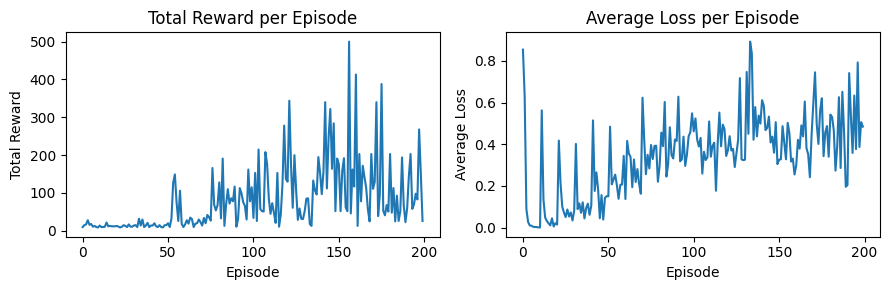

In [127]:
import torch
import torch.nn.functional as F
import copy

# Initialize the Q-network and Target Network
q_network = QNetwork(state_dim, action_dim)
target_network = copy.deepcopy(q_network)  # Create a copy of the Q-network as the target network
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
target_update_freq = 10  # Update target network every 10 episodes
epsilon = 0.5 # Initial epsilon for epsilon
# Updated train_q_network to use the target network
def train_q_network(q_network, target_network, optimizer, gamma, states, actions, rewards, next_states, dones):
    states = torch.FloatTensor(states)  # Shape: (batch_size, state_dim)
    next_states = torch.FloatTensor(next_states)  # Shape: (batch_size, state_dim)
    actions = torch.LongTensor(actions)  # Shape: (batch_size,)
    rewards = torch.FloatTensor(rewards)  # Shape: (batch_size,)
    dones = torch.FloatTensor(dones).float()  # Convert to float tensor with Shape: (batch_size,)

    # Compute current Q-values for the chosen actions in each state in the batch
    q_values = q_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)  # Shape: (batch_size,)

    # Compute target Q-values using the target network
    with torch.no_grad():
        next_q_values = target_network(next_states)  # Get Q-values for all actions in next states
        max_next_q_values = next_q_values.max(1)[0]  # Max Q-value for each next state

        # Compute target Q-value
        target_q_values = rewards + gamma * max_next_q_values * (1 - dones)  # Shape: (batch_size,)

    # Compute loss and update the Q-network
    loss = F.mse_loss(q_values, target_q_values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.item()
# Lists to store rewards and losses for plotting
all_rewards = []
all_losses = []
# Training loop with target network update
for episode in range(200):
    state = env.reset()[0]
    total_reward = 0
    done = False
    episode_losses = []
    
    while not done:
        action = choose_action(state, action_dim, epsilon, q_network)
        next_state, reward, done, truncated, _ = env.step(action)
        if truncated:
            done = True

        replay_buffer.store((state, action, reward, next_state, done))
        
        # Train only if we have enough samples in the buffer
        if replay_buffer.size() >= batch_size:
            states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)
            loss = train_q_network(q_network, target_network, optimizer, gamma, states, actions, rewards, next_states, dones)
            episode_losses.append(loss)  # Record loss for this step
        
        total_reward += reward
        state = next_state
        
    all_rewards.append(total_reward)
    all_losses.append(np.mean(episode_losses))  # Record average loss for this episode
    # Update target network every few episodes
    # epsilon = max(0.01, epsilon * 0.995)  # Decay epsilon over time

    if episode % target_update_freq == 0:
        target_network.load_state_dict(q_network.state_dict())
    if done:
        print(f"Episode {episode+1}, Total Reward: {total_reward}, Loss: {loss:.4f}")
env.close()

# Plotting total rewards per episode
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")

# Plotting average loss per episode
plt.subplot(1, 2, 2)
plt.plot(all_losses)
plt.xlabel("Episode")
plt.ylabel("Average Loss")
plt.title("Average Loss per Episode")

plt.tight_layout()
plt.show()

In [117]:
print(epsilon)

0.2605976537429438


In [130]:
# Initialize the Q-network and Target Network
q_network = QNetwork(state_dim, action_dim)
target_network = copy.deepcopy(q_network)  # Create a copy of the Q-network as the target network
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
target_update_freq = 10  # Update target network every 10 episodes
epsilon = 0.5 # Initial epsilon for epsilon

def train_q_network_double_dqn(q_network, target_network, optimizer, gamma, states, actions, rewards, next_states, dones):
    states = torch.FloatTensor(states)  # Shape: (batch_size, state_dim)
    next_states = torch.FloatTensor(next_states)  # Shape: (batch_size, state_dim)
    actions = torch.LongTensor(actions)  # Shape: (batch_size,)
    rewards = torch.FloatTensor(rewards)  # Shape: (batch_size,)
    dones = torch.FloatTensor(dones).float()  # Shape: (batch_size,)

    # Compute current Q-values for each action in the batch
    q_values = q_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)  # Shape: (batch_size,)

    # Double DQN target calculation
    with torch.no_grad():
        # Use the online Q-network to select the best action in the next state
        next_q_values_online = q_network(next_states)
        next_actions = next_q_values_online.argmax(1)  # Shape: (batch_size,)

        # Use the target network to evaluate the Q-value of the selected action
        next_q_values_target = target_network(next_states)
        max_next_q_values = next_q_values_target.gather(1, next_actions.unsqueeze(1)).squeeze(1)  # Shape: (batch_size,)

        # Compute target Q-value
        target_q_values = rewards + gamma * max_next_q_values * (1 - dones)  # Shape: (batch_size,)

    # Compute loss and perform optimization
    loss = F.mse_loss(q_values, target_q_values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.item()

Episode 1, Total Reward: 13.0, Loss: 0.6384
Episode 2, Total Reward: 24.0, Loss: 0.1727
Episode 3, Total Reward: 36.0, Loss: 0.0340
Episode 4, Total Reward: 20.0, Loss: 0.0274
Episode 5, Total Reward: 16.0, Loss: 0.0170
Episode 6, Total Reward: 19.0, Loss: 0.0205
Episode 7, Total Reward: 10.0, Loss: 0.0178
Episode 8, Total Reward: 12.0, Loss: 0.0053
Episode 9, Total Reward: 10.0, Loss: 0.0082
Episode 10, Total Reward: 10.0, Loss: 0.0023
Episode 11, Total Reward: 11.0, Loss: 0.0086
Episode 12, Total Reward: 20.0, Loss: 0.1237
Episode 13, Total Reward: 13.0, Loss: 0.0251
Episode 14, Total Reward: 16.0, Loss: 0.0016
Episode 15, Total Reward: 12.0, Loss: 0.0009
Episode 16, Total Reward: 13.0, Loss: 0.0022
Episode 17, Total Reward: 15.0, Loss: 0.0027
Episode 18, Total Reward: 8.0, Loss: 0.0038
Episode 19, Total Reward: 10.0, Loss: 0.0004
Episode 20, Total Reward: 13.0, Loss: 0.0006
Episode 21, Total Reward: 12.0, Loss: 0.0018
Episode 22, Total Reward: 9.0, Loss: 0.1699
Episode 23, Total Rew

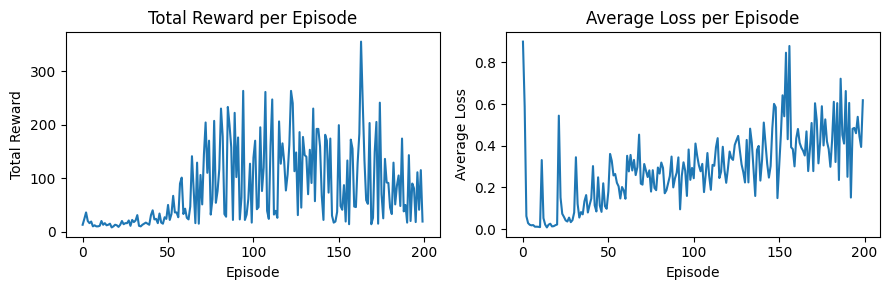

In [131]:
# Lists to store rewards and losses for plotting
all_rewards = []
all_losses = []
# Training loop with target network update
for episode in range(200):
    state = env.reset()[0]
    total_reward = 0
    done = False
    episode_losses = []
    
    while not done:
        action = choose_action(state, action_dim, epsilon, q_network)
        next_state, reward, done, truncated, _ = env.step(action)
        if truncated:
            done = True

        replay_buffer.store((state, action, reward, next_state, done))
        
        # Train only if we have enough samples in the buffer
        if replay_buffer.size() >= batch_size:
            states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)
            loss = train_q_network_double_dqn(q_network, target_network, optimizer, gamma, states, actions, rewards, next_states, dones)
            episode_losses.append(loss)  # Record loss for this step
        
        total_reward += reward
        state = next_state
        
    all_rewards.append(total_reward)
    all_losses.append(np.mean(episode_losses))  # Record average loss for this episode
    # Update target network every few episodes
    # epsilon = max(0.01, epsilon * 0.995)  # Decay epsilon over time

    if episode % target_update_freq == 0:
        target_network.load_state_dict(q_network.state_dict())
    if done:
        print(f"Episode {episode+1}, Total Reward: {total_reward}, Loss: {loss:.4f}")
env.close()

# Plotting total rewards per episode
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")

# Plotting average loss per episode
plt.subplot(1, 2, 2)
plt.plot(all_losses)
plt.xlabel("Episode")
plt.ylabel("Average Loss")
plt.title("Average Loss per Episode")

plt.tight_layout()
plt.show()

In [132]:
#Test Function for DQN and Double DQN:
def test(env, q_network, epsilon, num_episodes):
    total_rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = choose_action(state, action_dim, epsilon, q_network)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            state = next_state
            if done:
                break
        total_rewards.append(total_reward)
    print(f"Test completed with total reward: {np.mean(total_rewards)}")

In [ ]:
#Hyperparameter Settings:
num_episodes = 500
batch_size = 64
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 1000
learning_rate = 0.01
replay_buffer = ReplayBuffer(10000)

# Environment Set Up
env = gym.make('CartPole-v1', render_mode="rgb_array")
env.seed(2024)
env.action_space.seed(2024)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Initialize Q-Network and Optimizer for DQN:
q_network1 = QNetwork(state_dim, action_dim)
target_network1 = QNetwork(state_dim, action_dim)
update_target_network(q_network1, target_network1)
optimizer = optim.Adam(q_network1.parameters(), lr=learning_rate)


# Initialize Q-Network and Optimizer for Double-DQN:
q_network2 = QNetwork(state_dim, action_dim)
target_network2 = QNetwork(state_dim, action_dim)
update_target_network(q_network2, target_network1)
optimizer = optim.Adam(q_network2.parameters(), lr=learning_rate)